In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
import requests
import base64
import json

from PIL import Image
import numpy as np
import tensorflow as tf
import bentoml
import mlflow

2022-11-20 12:50:59.814168: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
endpoint_text = "http://0.0.0.0:3000/predict_text"
# endpoint = "https://youjin2-pet-pawpularity.herokuapp.com/predict_text"
image_path = "../petfinder/data/raw/train/0365920c849af714930d75e7727c5165.jpg"

In [4]:
with open(image_path, "rb") as f:
    image_buffer = f.read()

In [6]:
response = requests.post(
    endpoint,
    data=base64.b64encode(image_buffer),
    headers={"content-type": "text/plain"},
)
print(f"status code: {response.status_code}")
print(f"prediction result: {json.loads(response.text)}")

status code: 200
prediction result: [39.54513168334961]


In [7]:
image = Image.open(image_path, mode="r")

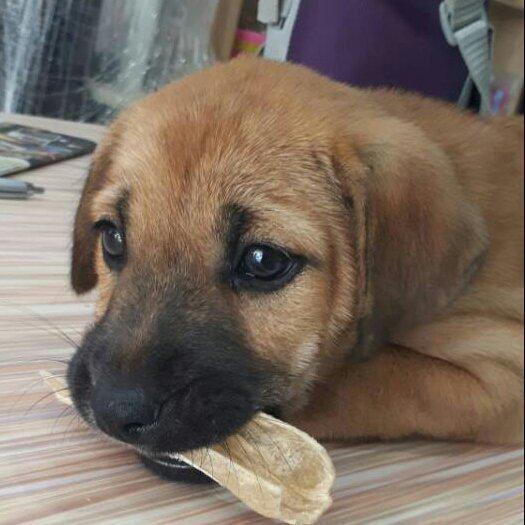

In [8]:
image

In [ ]:
endpoint_text = "http://0.0.0.0:3000/predict_text"
# endpoint = "https://youjin2-pet-pawpularity.herokuapp.com/predict_text"
image_path = "../petfinder/data/raw/train/0365920c849af714930d75e7727c5165.jpg"

In [ ]:
PIL.JpegImagePlugin.JpegImageFile

In [20]:
import PIL

In [32]:
import io

In [35]:
PIL.Image.open(io.BytesIO(f))

TypeError: a bytes-like object is required, not '_io.BufferedReader'

In [41]:
f = open(image_path, 'rb')

In [42]:
bytes(f, "UTF-8")

TypeError: encoding without a string argument

In [29]:
f = PIL.JpegImagePlugin.JpegImageFile(open(image_path, 'rb'))

In [45]:
# import requests

# with open("test.jpg", "rb") as f:
#     image_bytes = f.read()  # from file path

# files = {
#     "image": ("test.jpg", image_bytes),
# }
# response = requests.post(your_url, files=files)

In [46]:
f = open(image_path, 'rb').read()

In [55]:
response = requests.post(
    "http://0.0.0.0:3000/predict_image",
    files={"image": f},
    headers={"content-type": "image/jpeg", "accept": "application/json"},
#     headers={"content-type": "multipart/form-data"},
)
print(response.status_code)

400


In [56]:
response.text

'"BentoService error handling API request: Failed to parse uploaded image file"'

https://docs.bentoml.org/en/0.13-lts/api/adapters.html#imageinput